In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("../CWRU Dataset-2-train.csv")
Dtest = pd.read_csv("../CWRU Dataset-2-test.csv")

In [3]:
print(Dtrain.shape)
print(Dtest.shape)

(290688, 4)
(72672, 4)


In [4]:
Dtrain["Bearing"].value_counts()

Normal                 96896
Outer Race (0.021")    96896
Inner Race (0.021")    96896
Name: Bearing, dtype: int64

In [5]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Normal                 33.333333
Outer Race (0.021")    33.333333
Inner Race (0.021")    33.333333
Name: Bearing, dtype: float64

In [6]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))

In [10]:
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])

X_test  = X_test.values.reshape(-1, 1, X_test.shape[1])

In [11]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [12]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])),
    Dropout(0.2),
    RepeatVector(X_train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(loss='mse',optimizer='adam' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 6)              198       
Total params: 13,510
Trainable params: 13,510
Non-trainable params: 0
__________________________________________________

In [13]:
# Train model for 100 epochs, batch size of 100: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(X_train,X_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_data=(X_test, X_test),
                  shuffle=False)

Train on 290688 samples, validate on 72672 samples
Epoch 1/100
290688/290688 [==============================] - 9s 32us/step - loss: 0.1332 - val_loss: 0.2446
Epoch 2/100
290688/290688 [==============================] - 5s 17us/step - loss: 0.0851 - val_loss: 0.0936
Epoch 3/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0362 - val_loss: 0.0245
Epoch 4/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0222 - val_loss: 0.0090
Epoch 5/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0173 - val_loss: 0.0069
Epoch 6/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0148 - val_loss: 0.0075
Epoch 7/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0127 - val_loss: 0.0057
Epoch 8/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0108 - val_loss: 0.0049
Epoch 9/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0

290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 76/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 77/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 78/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 79/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 80/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 81/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0024
Epoch 82/100
290688/290688 [==============================] - 5s 17us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 83/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 84/100
290688/290688 [====

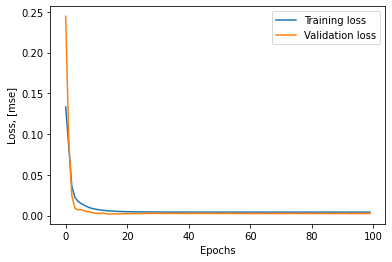

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [15]:
X_pred = model.predict(X_train)

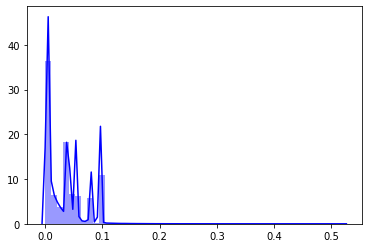

In [16]:
import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
#g.set(xlim=(0.10,0.1), ylim=(0, 1))
plt.show()

In [17]:
model.evaluate(X_test,X_test)

72672/72672 [==============================] - 2s 21us/step


0.0023944408629422

In [18]:
X_test_pred = model.predict(X_test)

In [19]:
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0],X_test_pred.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2])

In [20]:
TH = 0.1
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_test_pred-X_test), axis = 1)
scored['Threshold'] = TH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
61706,0.010521,0.1,False
31899,0.037552,0.1,False
26583,0.039601,0.1,False
52074,0.011061,0.1,False
64869,0.007976,0.1,False
...,...,...,...
22446,0.050913,0.1,False
15249,0.052475,0.1,False
41461,0.034878,0.1,False
44271,0.040797,0.1,False


In [21]:
X_pred_train = model.predict(np.array(X_train))

In [22]:
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0],X_pred_train.shape[2])
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2])

In [23]:
X_pred_train = pd.DataFrame(X_pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [24]:
scored_train['Loss_mae'].mean()

0.0354147087564852

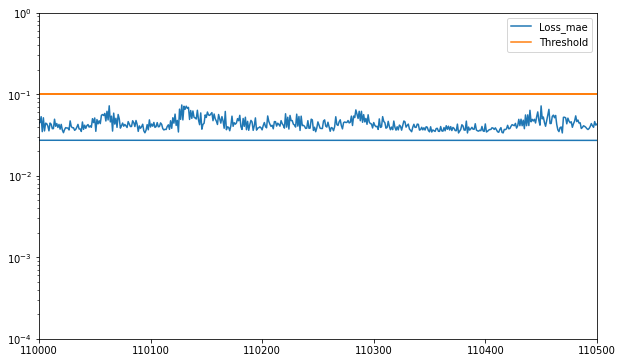

In [25]:
scored.plot(logy=True,  figsize = (10,6), xlim = [110000,110500], ylim = [1e-4,1e-0])

In [26]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.050444,0.1,False
1,0.052883,0.1,False
2,0.053723,0.1,False
3,0.054847,0.1,False
4,0.052252,0.1,False
...,...,...,...
290683,0.005404,0.1,False
290684,0.003482,0.1,False
290685,0.006751,0.1,False
290686,0.009553,0.1,False


In [27]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
201296  0.104242        0.1     True
209216  0.105734        0.1     True
210499  0.105046        0.1     True
212596  0.124716        0.1     True
212597  0.107662        0.1     True
215507  0.107104        0.1     True
243586  0.102716        0.1     True
246499  0.103468        0.1     True
247779  0.105991        0.1     True
264904  0.109827        0.1     True
264908  0.102758        0.1     True
264918  0.100367        0.1     True
266999  0.104990        0.1     True
267001  0.107462        0.1     True
267003  0.108963        0.1     True
267005  0.106676        0.1     True
269103  0.106486        0.1     True
273292  0.113896        0.1     True
275389  0.107552        0.1     True
275390  0.101315        0.1     True
276204  0.105816        0.1     True
276206  0.101091        0.1     True
276208  0.100460        0.1     True
276218  0.100373        0.1     True
280396  0.107884        0.1     True
284597  0.110881        0.1     True
(

In [28]:
NB_anomalies = anomalies[anomalies.index <= 96896]
print(NB_anomalies)
print(NB_anomalies.shape)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []
(0, 3)


In [29]:
IR7_anomalies = anomalies[anomalies.index > 96896]
print(IR7_anomalies)
print(IR7_anomalies.shape)

        Loss_mae  Threshold  Anomaly
201296  0.104242        0.1     True
209216  0.105734        0.1     True
210499  0.105046        0.1     True
212596  0.124716        0.1     True
212597  0.107662        0.1     True
215507  0.107104        0.1     True
243586  0.102716        0.1     True
246499  0.103468        0.1     True
247779  0.105991        0.1     True
264904  0.109827        0.1     True
264908  0.102758        0.1     True
264918  0.100367        0.1     True
266999  0.104990        0.1     True
267001  0.107462        0.1     True
267003  0.108963        0.1     True
267005  0.106676        0.1     True
269103  0.106486        0.1     True
273292  0.113896        0.1     True
275389  0.107552        0.1     True
275390  0.101315        0.1     True
276204  0.105816        0.1     True
276206  0.101091        0.1     True
276208  0.100460        0.1     True
276218  0.100373        0.1     True
280396  0.107884        0.1     True
284597  0.110881        0.1     True
(

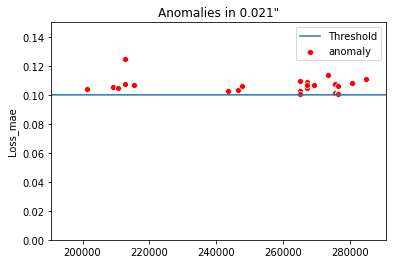

In [35]:
#plt.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
plt.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (len(scored_train.index)-100000, len(scored_train.index)), ylim = (0, 0.15))
plt.title('Anomalies in 0.021"')
plt.legend();